## Importing Required Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

## Data Ingestion

In [39]:
cafe_sales_path=r"C:\Users\user\Desktop\2 day deadline project\t_hothaly-attachments\Cafe_Sales_Data_2023 v3.xlsx"
events_path=r"C:\Users\user\Desktop\2 day deadline project\t_hothaly-attachments\Events_2023_2024.xlsx"
df_cafe_sales=pd.read_excel(cafe_sales_path)
df_events_data=pd.read_excel(events_path)

In [40]:
df_cafe_sales.head()

,Transaction ID,Date,Customer ID,Item Category,Product ID,Product Description,Quantity Sold,Sale Amount,Payment Type,Discount Applied,Discount Amount,Employee ID,Location,Temperature (°F),Branch
0,60,2023-01-01,1084,Tea,5013,Croissant,6,9.27,Mobile,No,0.00,243,Location3,63.0,Branch1
1,391,2023-01-01,1095,Coffee,5013,Croissant,8,25.10,Mobile,Yes,0.71,210,Location1,73.4,Branch1
2,758,2023-01-01,1008,Tea,5005,Bagel,7,6.25,Credit Card,Yes,4.74,246,Location1,50.0,Branch1
3,918,2023-01-01,1050,Pastries,5006,Croissant,3,23.03,Credit Card,No,3.00,223,Location1,34.4,Branch1
4,496,2023-01-01,1063,Coffee,5005,Espresso,1,10.34,Mobile,Yes,0.00,205,Location1,75.4,Branch1


In [41]:
df_events_data.head()

,Date,Event Description
0,2023-05-27,Long Weekend
1,2023-06-19,Middle Beast Festival
2,2023-07-04,Independence Day
3,2023-09-05,Labor Day
4,2024-05-26,School Holiday


## <span style="color:darkbrown"> 1) Assess the data sets, identify any anomalies values, and report the findings and how you deal with them</span>

### Summary Statistics for Numeric and Categorical Columns

In [42]:
# For Numeric columns
df_cafe_sales.describe(include=[np.number],percentiles=[])

,Transaction ID,Customer ID,Product ID,Quantity Sold,Sale Amount,Discount Amount,Employee ID,Temperature (°F)
count,54750.000000,54750.000000,54750.000000,54750.000000,54750.000000,54750.000000,54750.000000,54750.000000
mean,501.993644,1050.280822,5008.025260,4.848877,26.830738,1.267463,224.361534,65.577847
std,287.177146,29.569339,4.369532,2.771101,13.284687,1.614993,14.299184,20.473667
min,1.000000,1001.000000,5001.000000,-9.000000,-8.490000,0.000000,201.000000,30.100000
50%,499.000000,1051.000000,5008.000000,5.000000,26.660000,0.080000,224.000000,65.300000
max,1000.000000,1100.000000,5015.000000,9.000000,49.980000,5.000000,250.000000,100.000000


In [43]:
# For Categorical columns
df_cafe_sales.describe(include=['object'])

,Item Category,Product Description,Payment Type,Discount Applied,Location,Branch
count,54750,54750,54750,54750,54750,54750
unique,4,5,4,3,3,3
top,Coffee,Croissant,Credit Card,No,Location1,Branch1
freq,14604,12051,18153,27609,20217,18250


## Summary statistics brief insights
- Sale Amount and Quantity sold has negative values
- Count of both numeric and categorical columns tell there is no missing values
- Mean Sale Amount for each sale is $26.6
- Temperature lies from 30 F to 100 F
- Top item category is Coffee
- Credit card is the most frequently used Payment Type

### Upon reviewing the summary statistics clearly, the next step is to identify the negative sales amount and quantity sold value from the dataset.

In [44]:
# Select the rows that have negative value for Sale Amount
anamolies=df_cafe_sales[(df_cafe_sales['Sale Amount'] < 0) | (df_cafe_sales['Quantity Sold'] < 0) ] 

In [45]:
#How many rows have negative values
row_count = anamolies.shape[0]
print(f"Total number of rows: {row_count}")

Total number of rows: 1035








### There are 1035 rows where Sale Amount and Quantity sold is negative. <span style="color: red">There is not enough information as to tell why Sale Amount and Quantity Sold is negative.</span> The possible strategies to opt from here are: 

 - Engage with Stakeholders and discuss for any possible reason to why both the KPI's showing negative values
 - Remove the negative Sale Amount and Quantity Sold rows as there is no clear explanation
 - Replace the negative Sale Amount and Quantity Sold value with zero


### Strategy implemented

#### <span style="color:blue">Replace the negative Sale Amount and Quantity Sold with zero</span>
Removing all rows with negative Sale Amount and Quantity sold can effect data integrity as 516 rows of data is not less to ignore. Additionally, after engaging with stakeholders the negative Sale Amount cannot be added again in the analysis. So, the best strategy yet is to replace negative Sale Amount and Quantity Sold values with zero. It can be changed back to negative if required after engaging with stakeholders. 







In [46]:
# Replace negative Sale Amount and Quantity Sold with 0
df_cafe_sales['Sale Amount'] = df_cafe_sales['Sale Amount'].apply(lambda x: x if x >= 0 else 0) 
df_cafe_sales['Quantity Sold'] = df_cafe_sales['Quantity Sold'].apply(lambda x: x if x >= 0 else 0)
df_cafe_sales.describe(include=np.number)

,Transaction ID,Customer ID,Product ID,Quantity Sold,Sale Amount,Discount Amount,Employee ID,Temperature (°F)
count,54750.000000,54750.000000,54750.000000,54750.000000,54750.000000,54750.000000,54750.000000,54750.000000
mean,501.993644,1050.280822,5008.025260,4.896932,26.876262,1.267463,224.361534,65.577847
std,287.177146,29.569339,4.369532,2.623909,13.181697,1.614993,14.299184,20.473667
min,1.000000,1001.000000,5001.000000,0.000000,0.000000,0.000000,201.000000,30.100000
25%,256.000000,1024.000000,5004.000000,3.000000,15.500000,0.000000,212.000000,48.400000
50%,499.000000,1051.000000,5008.000000,5.000000,26.660000,0.080000,224.000000,65.300000
75%,750.000000,1075.000000,5012.000000,7.000000,38.040000,2.540000,237.000000,83.300000
max,1000.000000,1100.000000,5015.000000,9.000000,49.980000,5.000000,250.000000,100.000000


- Negative Sale Amount values are changed to zero
- Negative Quantity Sold values are changed to zero

### Checking for data types

In [47]:
# For Cafe Sales Data
df_cafe_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54750 entries, 0 to 54749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       54750 non-null  int64         
 1   Date                 54750 non-null  datetime64[ns]
 2   Customer ID          54750 non-null  int64         
 3   Item Category        54750 non-null  object        
 4   Product ID           54750 non-null  int64         
 5   Product Description  54750 non-null  object        
 6   Quantity Sold        54750 non-null  int64         
 7   Sale Amount          54750 non-null  float64       
 8   Payment Type         54750 non-null  object        
 9   Discount Applied     54750 non-null  object        
 10  Discount Amount      54750 non-null  float64       
 11  Employee ID          54750 non-null  int64         
 12  Location             54750 non-null  object        
 13  Temperature (°F)     54750 non-

In [48]:
# For Events data
df_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8 non-null      datetime64[ns]
 1   Event Description  8 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 260.0+ bytes


## <span style="color:darkbrown"> 2) Investigate how external factors, such as temperature, and Events correlate with sales performance</span>

- To find correlation between Sale Amount and Events, Events dataframe can be combined with Cafe Sale dataframe to find a correlation. A left join would work here
- Temperature column is already present in the Cafe Sale data

#### Are Events Correlated with Sale Amount?

In [49]:
# Merge Cafe Sale data with Events data on Date
merged_data = pd.merge(df_cafe_sales, df_events_data, on='Date', how='left')
merged_data.head()

,Transaction ID,Date,Customer ID,Item Category,Product ID,Product Description,Quantity Sold,Sale Amount,Payment Type,Discount Applied,Discount Amount,Employee ID,Location,Temperature (°F),Branch,Event Description
0,60,2023-01-01,1084,Tea,5013,Croissant,6,9.27,Mobile,No,0.00,243,Location3,63.0,Branch1,NaN
1,391,2023-01-01,1095,Coffee,5013,Croissant,8,25.10,Mobile,Yes,0.71,210,Location1,73.4,Branch1,NaN
2,758,2023-01-01,1008,Tea,5005,Bagel,7,6.25,Credit Card,Yes,4.74,246,Location1,50.0,Branch1,NaN
3,918,2023-01-01,1050,Pastries,5006,Croissant,3,23.03,Credit Card,No,3.00,223,Location1,34.4,Branch1,NaN
4,496,2023-01-01,1063,Coffee,5005,Espresso,1,10.34,Mobile,Yes,0.00,205,Location1,75.4,Branch1,NaN


In [50]:
# Sales performance during events
mean_daily_sale_amount = df_cafe_sales.groupby(df_cafe_sales['Date'].dt.date)['Sale Amount'].sum()
print(mean_daily_sale_amount.head())
sales_during_events = merged_data.groupby('Event Description')[['Sale Amount']].sum().reset_index()
sales_during_events

Date
2023-01-01    4260.54
2023-01-02    3620.97
2023-01-03    4470.87
2023-01-04    4129.23
2023-01-05    4215.27
Name: Sale Amount, dtype: float64


,Event Description,Sale Amount
0,Independence Day,3847.92
1,Labor Day,3414.36
2,Long Weekend,4631.49
3,Middle Beast Festival,4060.80


#### Insights
- There is no correlation between event days and Sale Amount. Moreover, there are only 4 events that are covered in 2023. So, the data is too less to indicate any potential relationship between event days and Sale Amount

#### How Temperature correlates with Sale Amount?

In [51]:
# Correlation between temperature and sales amount
correlation = df_cafe_sales['Temperature (°F)'].corr(df_cafe_sales['Sale Amount'])
print("Correlation between Temperature and Sales Amount:", correlation)

Correlation between Temperature and Sales Amount: -0.019565576859212203


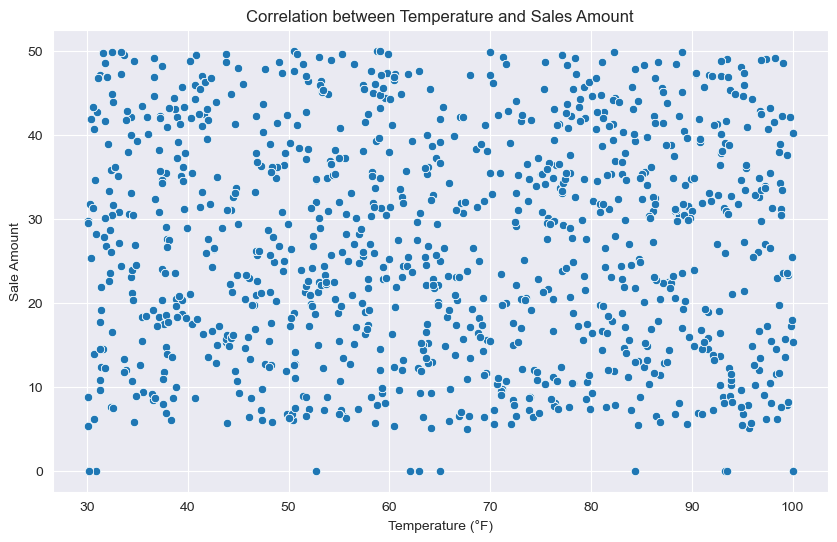

In [52]:
# Plot correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (°F)', y='Sale Amount', data=df_cafe_sales)
plt.title('Correlation between Temperature and Sales Amount')
plt.show()

#### Insights
- It is clear from the correlation analysis and scatter plot that there is no relationship between Temprerature and Sale Amount.
- The mean temperature is 65.5 F which is a suitable temperature to go out to a cafe. The highest temperature is 100F which is also bearable. So, it has very negliglibe to no relationship with Sale Amount

## <span style="color:darkbrown"> 3) Analyze the sales performance across various categories </span>

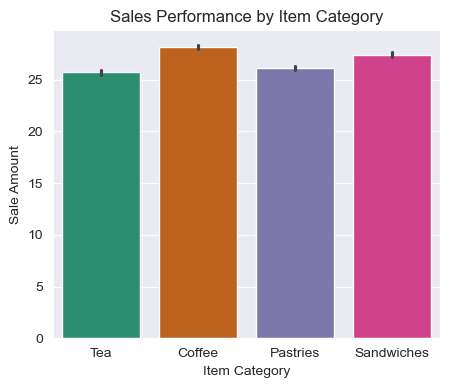

In [53]:
# Plot sales performance by category
plt.figure(figsize=(5, 4))
sns.barplot(x='Item Category', y='Sale Amount', data=df_cafe_sales, hue='Item Category' ,palette='Dark2',legend=False)
plt.title('Sales Performance by Item Category')
plt.show()

In [54]:
#Adding month column in the dataset
df_cafe_sales['Month']=  df_cafe_sales['Date'].dt.month

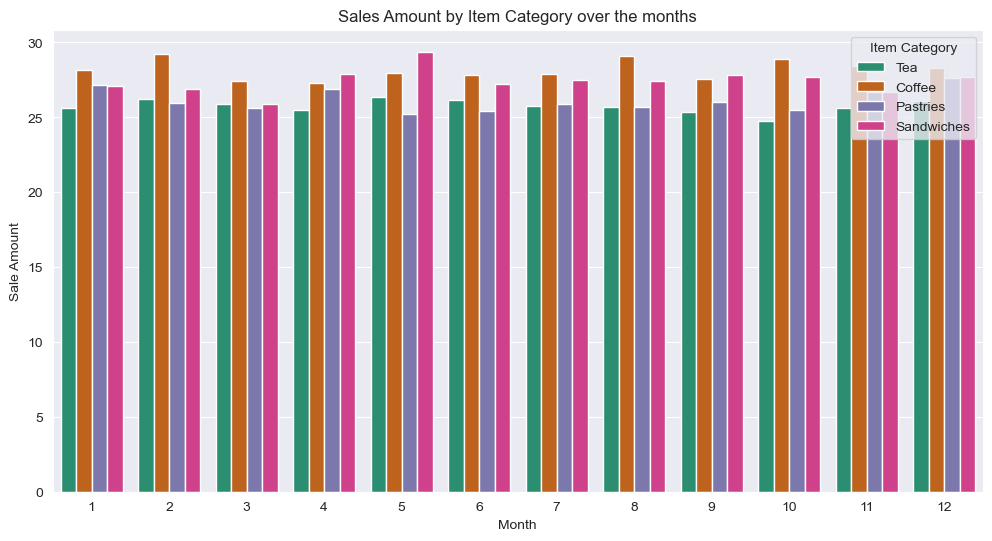

In [55]:
# Plotting sales performance by Item Category over the months
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Sale Amount', data=df_cafe_sales,hue='Item Category',errorbar=None,palette='Dark2')
plt.title('Sales Amount by Item Category over the months')
plt.show()

### Insights
- The most Sale Amount comes from Coffee.
- Sandwiches comes at second
- Pastries comes at third and tea at last

## <span style="color:darkbrown"> 4) Construct models to predict sales for the upcoming quarter. Test various predictive model and select the one that delivers the best accuracy </span>

#### Data Preprocessing

In [56]:
# Data Proprocessing
df_cafe_sales['Day of Year'] = df_cafe_sales['Date'].dt.dayofyear
df_cafe_sales['Month'] = df_cafe_sales['Date'].dt.month
df_cafe_sales['Day of Week'] = df_cafe_sales['Date'].dt.dayofweek

# Aggregate data by day
df_cafe_sale_daily = df_cafe_sales.groupby('Date').agg({
    'Sale Amount': 'sum',
    'Day of Year': 'first',
    'Quantity Sold': 'mean',
    'Discount Amount': 'mean',
    'Temperature (°F)': 'mean',
    'Month': 'first',
    'Day of Week': 'first'
}).reset_index()

In [57]:
# Splitting the data
X = df_cafe_sale_daily[['Quantity Sold','Discount Amount','Month','Day of Week','Day of Year']]
y = df_cafe_sale_daily['Sale Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [58]:
# Fit the model 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [59]:
# Evaluate the model 
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
print(mse,rmse)

103515.75287855905 321.7386406364008


### Random Forest Regressor

In [60]:
rf_model = RandomForestRegressor(random_state=42)

In [61]:
#GridsearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [62]:
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

In [63]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(mse_rf,rmse_rf)

112711.3990108923 335.7251837603076


#### Generate Line plot for Q1 2024 Sale Amount

In [64]:
# Generate future dates for Q1 2024
Q1_2024 = pd.date_range(start='2024-01-01', end='2024-03-31', freq='D')
Q1_2024 = pd.DataFrame({
    'Date': Q1_2024,
    'Day of Year': Q1_2024.dayofyear,
    'Month': Q1_2024.month,
    'Day of Week': Q1_2024.dayofweek,
    'Quantity Sold': np.mean(df_cafe_sale_daily['Quantity Sold']),  
    'Discount Amount': np.mean(df_cafe_sale_daily['Discount Amount']), 
    'Temperature (°F)': np.mean(df_cafe_sale_daily['Temperature (°F)'])  
})

In [65]:
# Predict Sale Amount for Q1 2024 using both models
X_future = Q1_2024[['Quantity Sold','Discount Amount','Month','Day of Week','Day of Year']]
Q1_2024['Predicted Sale Amount (Linear)'] = linear_model.predict(X_future)
Q1_2024['Predicted Sale Amount (RF)'] = best_rf_model.predict(X_future)

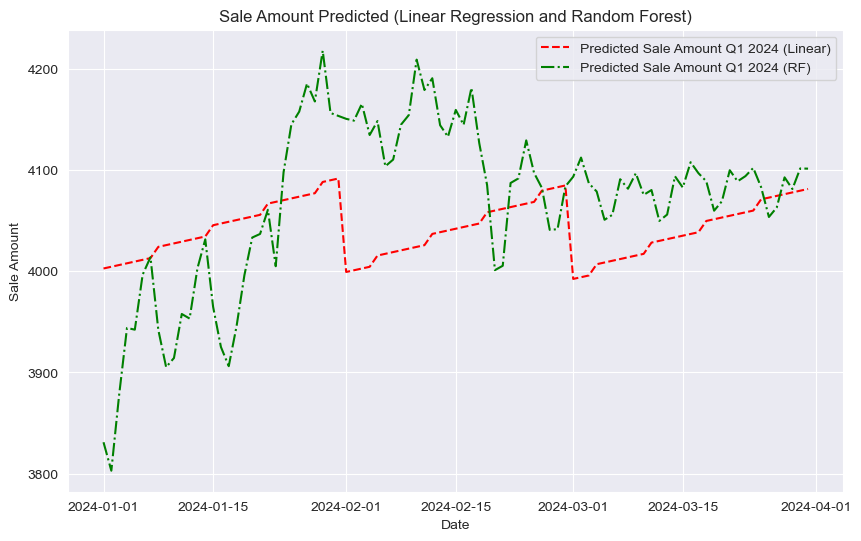

In [66]:
#Line Chart to visualize the Sale Amount for Q1 2024
plt.figure(figsize=(10, 6))
plt.plot(Q1_2024['Date'], Q1_2024['Predicted Sale Amount (Linear)'], label='Predicted Sale Amount Q1 2024 (Linear)', color='red', linestyle='--')
plt.plot(Q1_2024['Date'], Q1_2024['Predicted Sale Amount (RF)'], label='Predicted Sale Amount Q1 2024 (RF)', color='green', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Sale Amount')
plt.title('Sale Amount Predicted (Linear Regression and Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

### Insights
- Both the models are processed to calculate the Sale Amount per day, not per Order
- Both the models predict the Q1 2024 Sale Amount with rmse value of ~324 and ~330 respectively
- The performance of the models predicting the Sale Amount is almost same because both the models were trained with same features
- Random Forest Regressor uses GridsearchCV to find the best estimator for the model and the fluctuating price interprets that RF is more precise than Linear model
- Random Forest Regressor is more accurate than Linear Regression

## <span style="color:darkbrown"> 5) Analyze the effects of applied discounts on the sales volume and propose a strategy/recommendation to optimize discount offerings </span>

In [67]:
#Feature Engineering
df_cafe_sales['Discount Rate'] = df_cafe_sales['Discount Amount'] / df_cafe_sales['Sale Amount']

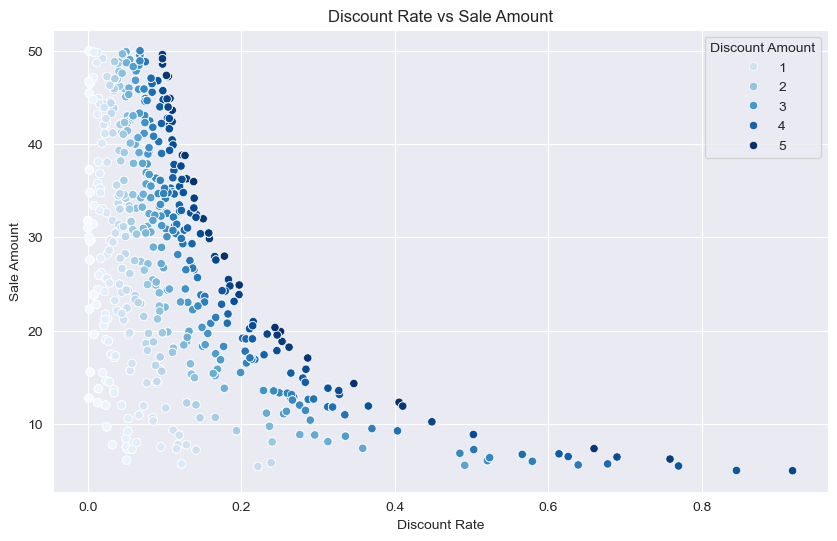

In [68]:
#Scatterplot to show relationship between Sale Amount and Discount rate 
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
discount_rate = df_cafe_sales.query('`Discount Rate` > 0')
sns.scatterplot(x='Discount Rate', y='Sale Amount', data=discount_rate,hue='Discount Amount',palette='Blues')
plt.title('Discount Rate vs Sale Amount')
plt.show()

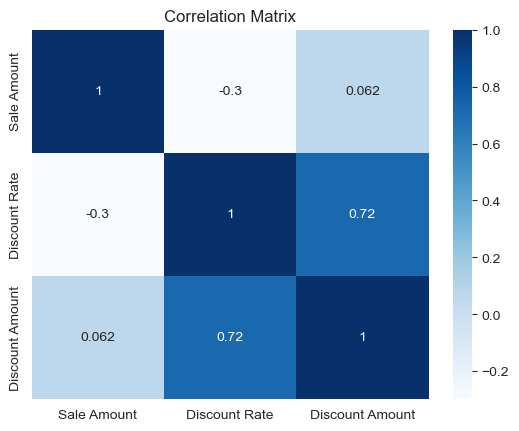

In [69]:
# Correlation Analysis
corr_matrix = df_cafe_sales[['Sale Amount', 'Discount Rate', 'Discount Amount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

#### Recommendation to Optimize Discount Offerings
- Discount Amount should be applied within the range of optimal discount rate (10% to 20%)
- Aftre 20% discount rate, the Sale Amount begins to decrease as we move along to 50% discount rate
- Correlation analysis suggests that Sale Amount and Discount Rate are negatively correlated i.e increasing the Discount can result in decreasing Sale Amount
- Further Regression analysis can be used to calculate the Optimal Discount Amount 

## <span style="color:darkbrown"> 7) As you have the sales for the year 2023, we need to have the forecast for the next 6 months, taken in consideration the events time </span>

### Implementing Autoregressive(AR) model

In [70]:
# Forecasting sales
monthly_sales = df_cafe_sales.groupby(df_cafe_sales['Date'].dt.to_period('M'))['Sale Amount'].sum().to_timestamp()
model = AutoReg(monthly_sales, lags=4,trend='ct')
model_fit = model.fit()

In [71]:
#Fitting the model and creating dates to forecast
forecast_steps = 6
forecast = model_fit.predict(start=len(monthly_sales), end=len(monthly_sales) + forecast_steps -1)
forecast_dates = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
forecast_series = pd.Series(forecast.values, index=forecast_dates)

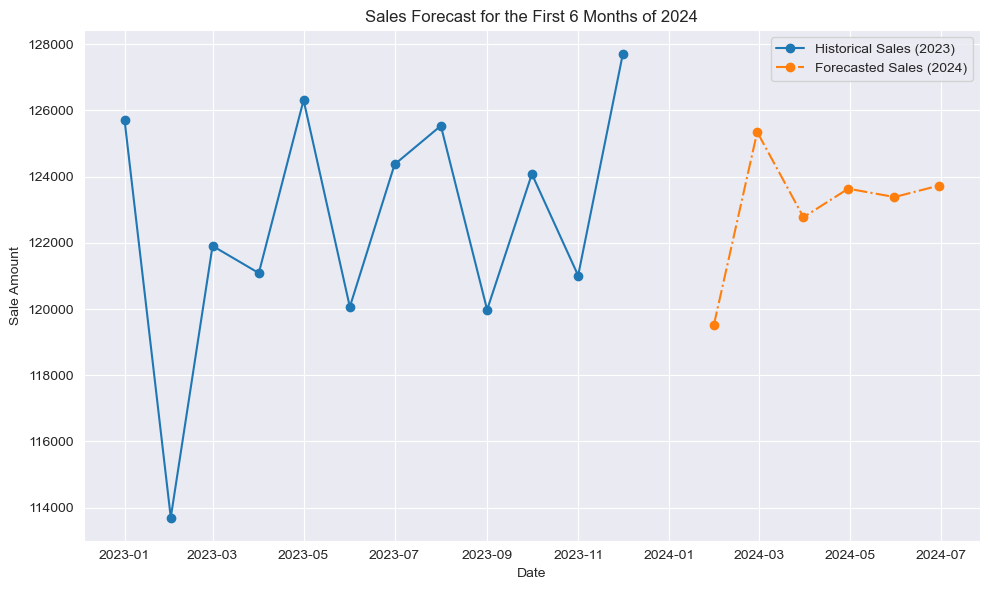

In [72]:
#Line Chart to visualize the Sale Amount for 2024
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales (2023)', marker='o')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Sales (2024)', linestyle='-.', marker='o')
plt.xlabel('Date')
plt.ylabel('Sale Amount')
plt.title('Sales Forecast for the First 6 Months of 2024')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights
- The forecast indicates that the sales will be low for first month of 2024
- Sale Amount would be at highest point of the forecast in the second month
- There is no seasonal parameters included in this model